# Delivery Risk Management for Supply Chains

## Dataset Overview
The **DataCo Supply Chain Dataset** is a simulated dataset commonly used for supply chain analysis. 
It includes information on customer demographics, order details, shipping logistics, and profitability metrics. 
This dataset provides a realistic foundation for exploring insights in customer behavior and supply chain efficiency.

## Analysis Questions
In this Supply Chain Analysis, I aim to answer the following questions:

- Question 1: How do different customer segments and demographics influence profitability and sales volume?

    By examining customer segments (e.g. region, demographics), we can identify high-value segments, tailor marketing strategies, and optimize resource allocation based on profitability potential.

- Question 2: Which predictive model performs best in predicting late delivery risk?

    This question focuses on identifying the model with the highest accuracy in predicting late delivery risk. By selecting the best-performing model, we can ensure more reliable predictions, which aids in planning and optimizing logistics operations.

- Question 3: What are the most significant factors contributing to late delivery risk?

    This question aims to identify the key factors driving late delivery risk. Understanding these factors can inform targeted improvements in shipping processes and help reduce delays, enhancing overall supply chain efficiency.

## Import Library

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Data Preprocessing

In [3]:
# Load Dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

### Missing Values

In [5]:
# Check for missing values
na_counts = np.sum(df.isna(), axis=0)
columns_with_na = na_counts[na_counts > 0]

print(columns_with_na)

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64


#### Missing Values Treatment

After examining the dataset for missing values, the following columns were identified as containing missing values:

- `Customer Lname` (8 missing values)
- `Customer Zipcode` (3 missing values)
- `Order Zipcode` (155,679 missing values)
- `Product Description` (180,519 missing values)

Since these columns are not considered essential for the prediction tasks, I decided not to fill the missing values. Instead, I will drop these columns from the dataset to simplify the analysis and avoid unnecessary noise in the model.

In [7]:
# List of columns
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

### Feature Selection Rationale
The following features were selected for delivery risk prediction:

- **Days for shipping (real)** & **Days for shipment (scheduled)**: The difference between the actual and scheduled shipping days directly impacts the likelihood of delays.

- **Benefit per order**: High profit per order may influence business priorities, as higher-value orders could be prioritized for faster processing, potentially affecting delivery risk.

- **Sales per customer**: Total sales per customer indicate customer value and repeat purchase frequency. Important or high-value customers may receive priority, affecting delivery timelines.

- **Delivery Status**: The previous delivery status offers insights into historical delivery patterns, providing valuable information to predict potential delays.

- **Late_delivery_risk**: Existing risk flags from previous orders help the model recognize recurring delay patterns, making it easier to identify orders at risk of delay.

- **Order Item Discount Rate**: High discount rates might reduce the priority of certain orders, potentially increasing delivery time and influencing risk.

- **Order Item Quantity**: Larger order quantities may require additional handling and preparation time, which could increase the chance of delays.

- **Order Profit Per Order**: Similar to benefit per order, per-order profit could affect prioritization, as high-profit items are more likely to be expedited, reducing delay risks.

- **Order Region** & **Market**: The location of the order and market can reflect logistical complexities. Certain regions might be more susceptible to delays due to distance, regulations, or infrastructure.

- **Shipping Mode**: The chosen shipping mode (e.g., standard, expedited) has a direct impact on expected delivery time and delay likelihood. Express shipping modes tend to have lower delay risks.

- **Order Item Product Price**: High product prices may lead to prioritized handling, as businesses might be inclined to prioritize valuable items to maintain customer satisfaction.


In [8]:
# Drop unnecessary columns
df = df.drop(['Type', 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 
 'Customer Street', 'Customer Zipcode', 'Customer City', 'Customer State', 
 'Customer Country', 'Customer Id', 'Latitude', 'Longitude', 'Product Description', 
 'Product Image', 'Product Status', 'Order Id', 'Order Item Id', 'Order Customer Id', 
 'Order Zipcode', 'Order City', 'Order State', 'Order Country', 
 'Order Item Cardprod Id', 'Order Item Discount', 'Product Card Id', 
 'order date (DateOrders)', 'shipping date (DateOrders)', 'Category Id',
 'Department Id', 'Product Category Id'], axis=1   )

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [9]:
# Standardize column names for consistency
df.columns = [col.lower().replace(' ', '_').replace('(','').replace(')','') for col in df.columns]

### Consolidating Low-Frequency Categories into 'Other'

In [10]:
df.select_dtypes(include=['object']).columns

Index(['delivery_status', 'category_name', 'customer_segment',
       'department_name', 'market', 'order_region', 'order_status',
       'product_name', 'shipping_mode'],
      dtype='object')

Among the categorical variables, `category_name` and `department_name` have the highest number of unique values. To simplify the data and improve interpretability, I performed a process to consolidate low-frequency levels in these variables, grouping less common values into an "Other" category.

In [11]:
# Calculate cumulative percentage for each category_name count
category_counts = df['category_name'].value_counts()
cumulative_counts = category_counts.cumsum() / category_counts.sum()

# Keep category names that make up to 90% of the total and label others as 'Other'
threshold_count = cumulative_counts[cumulative_counts <= 0.9].index
df['category_name'] = df['category_name'].apply(lambda x: x if x in threshold_count else 'Other')

# Check the result
df['category_name'].value_counts()

category_name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Other                   18388
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Name: count, dtype: int64

In [12]:
# Calculate cumulative percentage for each product_name count
product_counts = df['product_name'].value_counts()
cumulative_product_counts = product_counts.cumsum() / product_counts.sum()

# Keep product names that make up to 90% of the total and label others as 'Other'
threshold_product_names = cumulative_product_counts[cumulative_product_counts <= 0.9].index
df['product_name'] = df['product_name'].apply(lambda x: x if x in threshold_product_names else 'Other')

# Check the result
df['product_name'].value_counts()

product_name
Perfect Fitness Perfect Rip Deck                 24515
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Other                                            18439
Field & Stream Sportsman 16 Gun Fire Safe        17325
Pelican Sunstream 100 Kayak                      15500
Diamondback Women's Serene Classic Comfort Bi    13729
Nike Men's Free 5.0+ Running Shoe                12169
Under Armour Girls' Toddler Spine Surge Runni    10617
Fighting video games                               838
Children's heaters                                 652
Summer dresses                                     650
Web Camera                                         592
Toys                                               529
Adult dog supplies                                 492
Lawn mower                                         484
Porcelain crafts                                   4

## Exploratory Data Analysis (EDA)

### Numerical Features

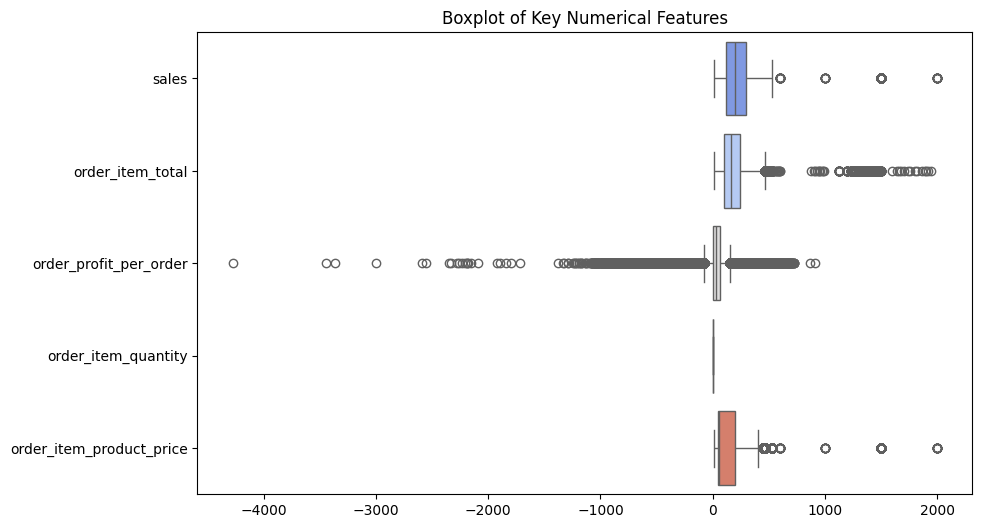

In [13]:
# Descriptive statistics for numerical features with boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['sales', 'order_item_total', 'order_profit_per_order', 'order_item_quantity', 'order_item_product_price']], 
            orient="h", palette="coolwarm")
plt.title('Boxplot of Key Numerical Features')
plt.show()

#### Insights from Boxplot of Key Numerical Features

1. **Outliers**: There are several extreme values (outliers) in each variable. In particular, `order_profit_per_order` exhibit significant outliers, which may require additional handling as they could impact the analysis.

2. **Profitability Variance**: The `order_profit_per_order` variable shows a wide range, including negative values, indicating that some orders resulted in a loss. This suggests a need to identify loss-making orders to improve overall profitability.

### Correlation

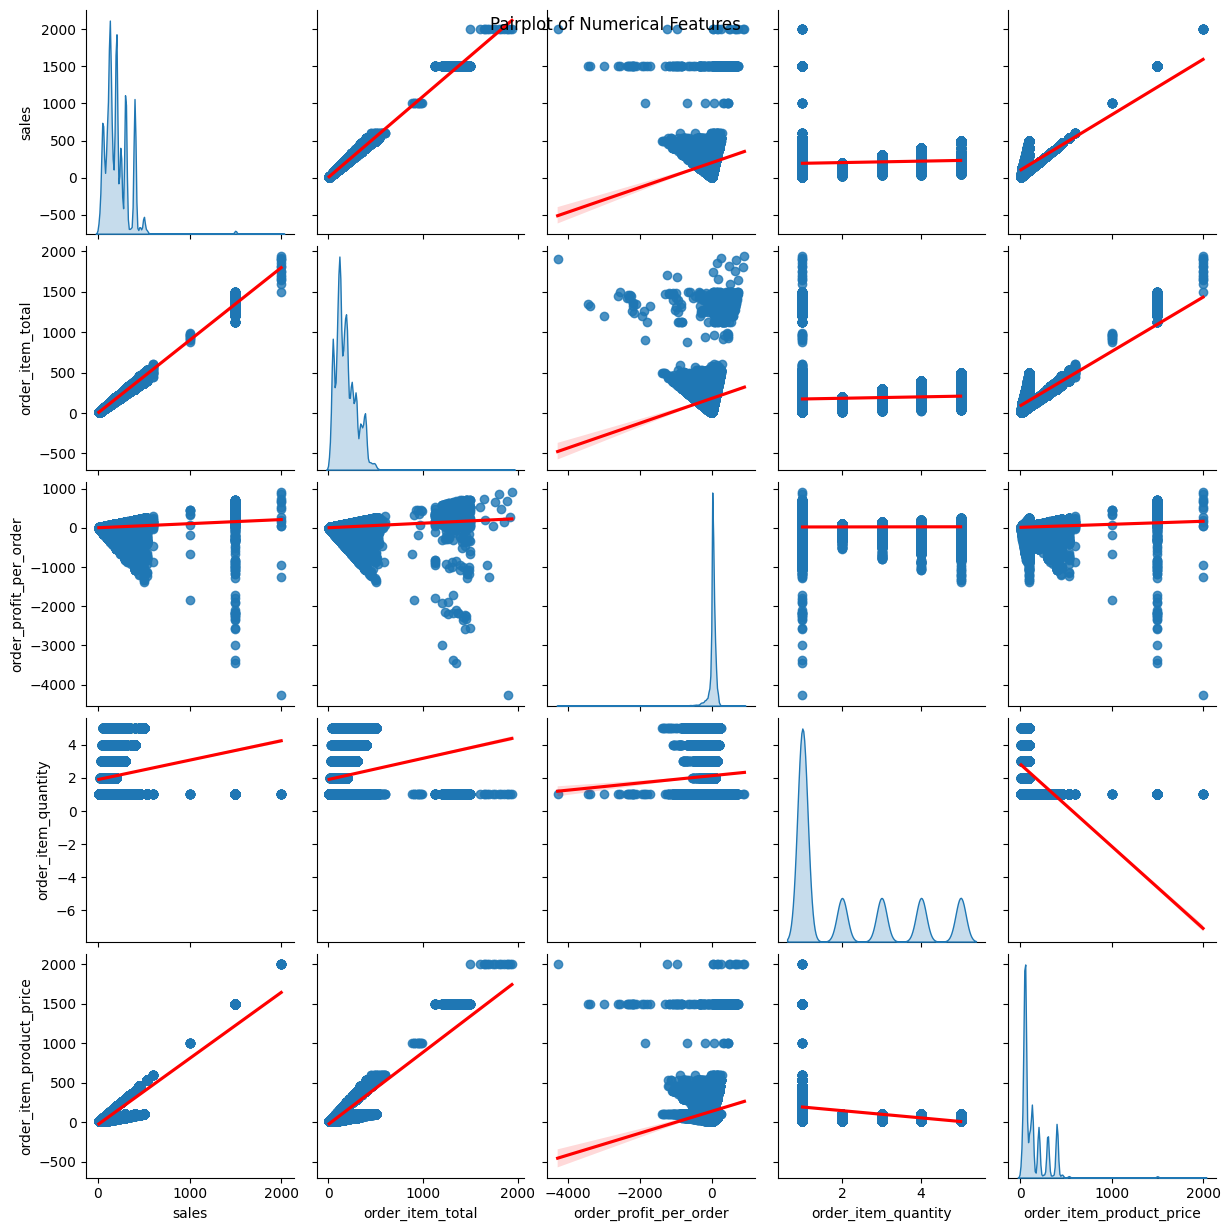

In [14]:
# Correlation Analysis between Numerical Features (Pairplot)
sns.pairplot(df[['sales', 'order_item_total', 'order_profit_per_order', 'order_item_quantity', 'order_item_product_price']],
             diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pairplot of Numerical Features')
plt.show()

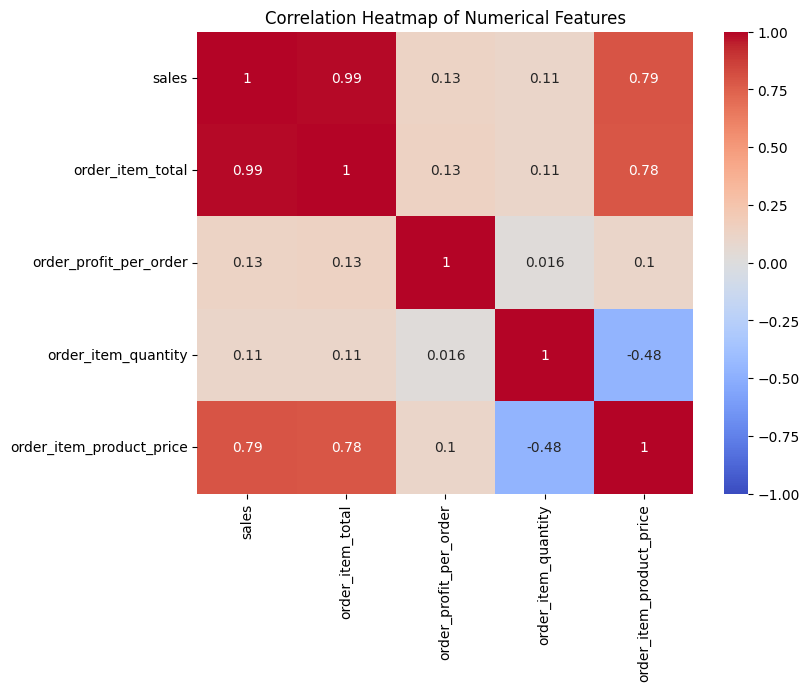

In [15]:
# Correlation Analysis between Numerical Features (Heatmap)
corr_matrix = df[['sales', 'order_item_total', 'order_profit_per_order', 'order_item_quantity', 'order_item_product_price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### Insights from the Correlation Heatmap

- **High correlation between 'sales' and 'order_item_total'**:
   The correlation coefficient between 'sales' and 'order_item_total' is 0.99, indicating an extremely strong relationship. This suggests that the total sales amount and the order item total are almost identical in how they vary. Given the high correlation, it would be beneficial to remove one of these variables in future analyses or modeling to reduce multicollinearity and simplify the model.

- **Negative correlation between 'order_item_quantity' and 'order_item_product_price'**:
   There is a negative correlation (-0.48) between 'order_item_quantity' and 'order_item_product_price', suggesting that products with lower prices tend to be ordered in larger quantities. In other words, items that are cheaper are more likely to be bought in bulk.

### Average Sales by Region

C:\Users\박주형\AppData\Local\Temp\ipykernel_6828\3359683906.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='order_region', y='sales', data=df, estimator=np.mean, ci='sd', palette='viridis')
C:\Users\박주형\AppData\Local\Temp\ipykernel_6828\3359683906.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_region', y='sales', data=df, estimator=np.mean, ci='sd', palette='viridis')


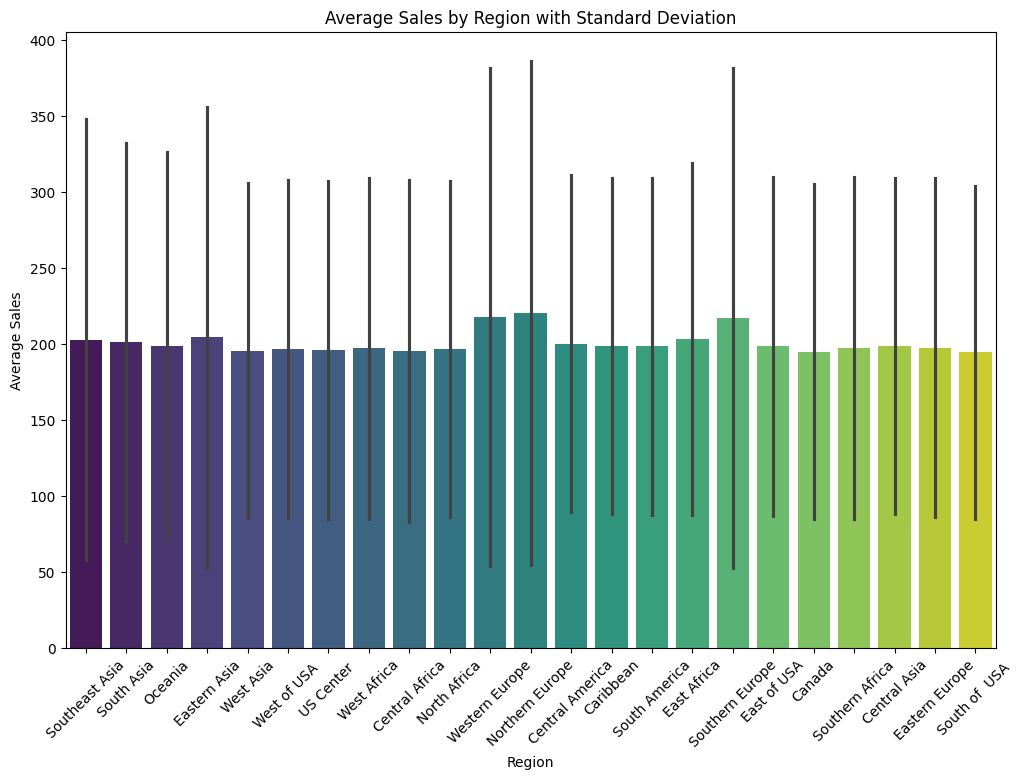

In [16]:
# Region-wise Sales Analysis (Barplot with Different Estimator)
plt.figure(figsize=(12, 8))
sns.barplot(x='order_region', y='sales', data=df, estimator=np.mean, ci='sd', palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Sales by Region with Standard Deviation')
plt.xlabel('Region')
plt.ylabel('Average Sales')
plt.show()

#### Insights from Average Sales by Region with Standard Deviation

1. **High Variability in Specific Regions**: Certain regions, such as **North Africa**, **Western Europe**, and **Southern Europe** display higher standard deviations, indicating more variability in sales. This could mean that these regions experience fluctuating demand, which might require more flexible inventory and supply chain management.

2. **Lower Average Sales Regions**: Regions, such as **Canada** and **South of USA**, exhibit slightly lower average sales. These regions could be areas to investigate for potential growth opportunities or targeted marketing strategies.

### Late Delivery Risk

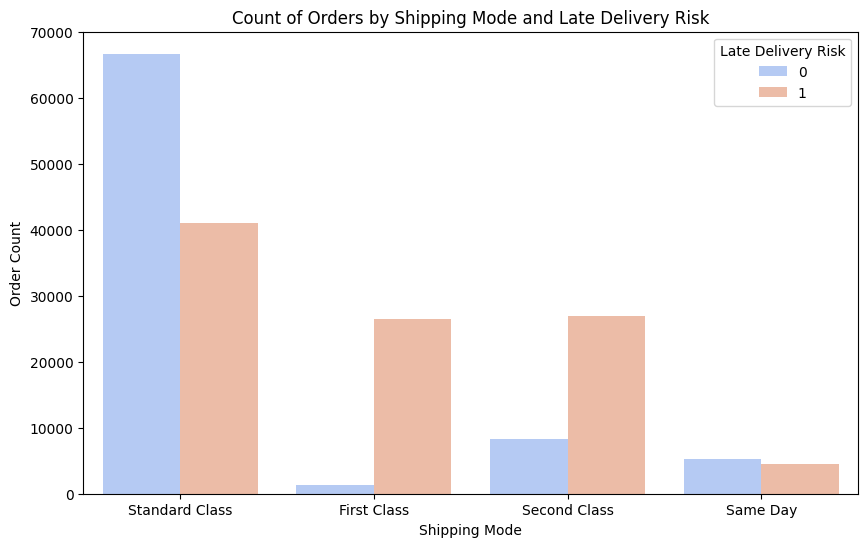

In [17]:
# Shipping Mode Analysis (Countplot with Hue for Late Delivery Risk)
plt.figure(figsize=(10, 6))
sns.countplot(x='shipping_mode', data=df, hue='late_delivery_risk', palette='coolwarm')
plt.title('Count of Orders by Shipping Mode and Late Delivery Risk')
plt.xlabel('Shipping Mode')
plt.ylabel('Order Count')
plt.legend(title='Late Delivery Risk')
plt.show()

#### Insights from Count of Orders by Shipping Mode and Late Delivery Risk

1. **Based on Proportion (Risk Ratio)**: When looking at the proportion of late deliveries relative to on-time deliveries, **First Class** has the highest late delivery risk ratio. This suggests that although First Class shipping is intended to be faster, a significant portion of these orders still end up delayed.

2. **Based on Frequency (Total Late Deliveries)**: In terms of the total number of late deliveries, **Standard Class** shipping mode accounts for the highest volume of delayed orders. This is likely due to its popularity and higher order count, leading to a larger absolute number of late deliveries compared to other shipping modes.


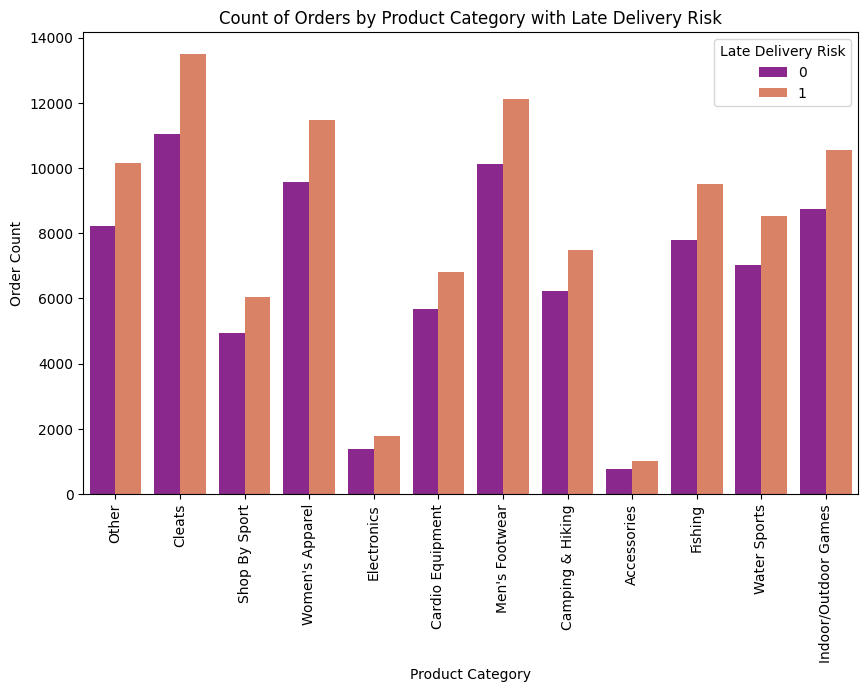

In [18]:
# Category Analysis: Count of Orders by Product Category (Countplot with Hue for Late Delivery Risk)
plt.figure(figsize=(10, 6))
sns.countplot(x='category_name', data=df, hue='late_delivery_risk', palette='plasma')
plt.xticks(rotation=90)
plt.title('Count of Orders by Product Category with Late Delivery Risk')
plt.xlabel('Product Category')
plt.ylabel('Order Count')
plt.legend(title='Late Delivery Risk')
plt.show()

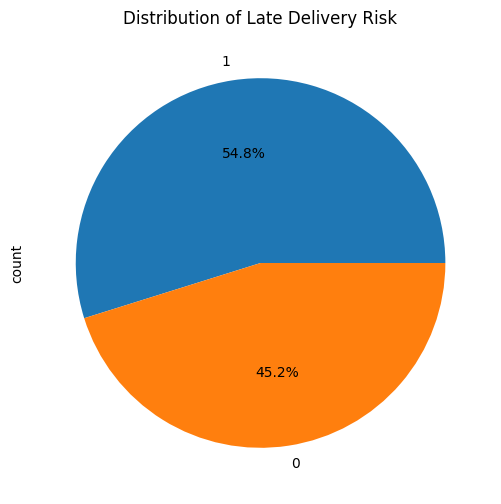

In [19]:
# Target Variable Analysis (Pie Chart for Late Delivery Risk Distribution)
plt.figure(figsize=(6, 6))
df['late_delivery_risk'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Late Delivery Risk')
plt.show()

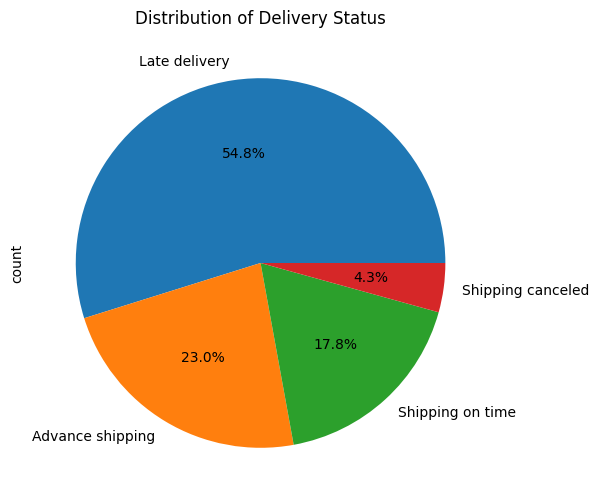

In [20]:
# Distribution of Delivery Status (Pie Chart for Late Delivery Risk Distribution)
plt.figure(figsize=(6, 6))
df['delivery_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Delivery Status')
plt.show()

<Figure size 1000x600 with 0 Axes>

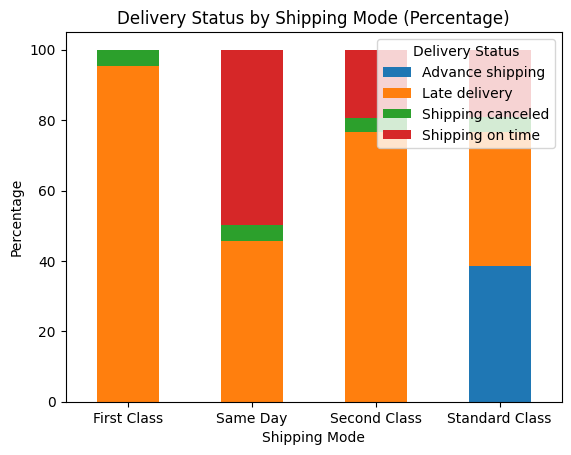

In [21]:
# Delivery Status Distribution by Shipping Mode (Stacked Bar Chart in Percentage)
delivery_status_by_mode = pd.crosstab(df['shipping_mode'], df['delivery_status'], normalize='index') * 100
plt.figure(figsize=(10, 6))
delivery_status_by_mode.plot(kind='bar', stacked=True)
plt.title('Delivery Status by Shipping Mode (Percentage)')
plt.xlabel('Shipping Mode')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.legend(title='Delivery Status', loc='upper right')
plt.show()
plt.show()

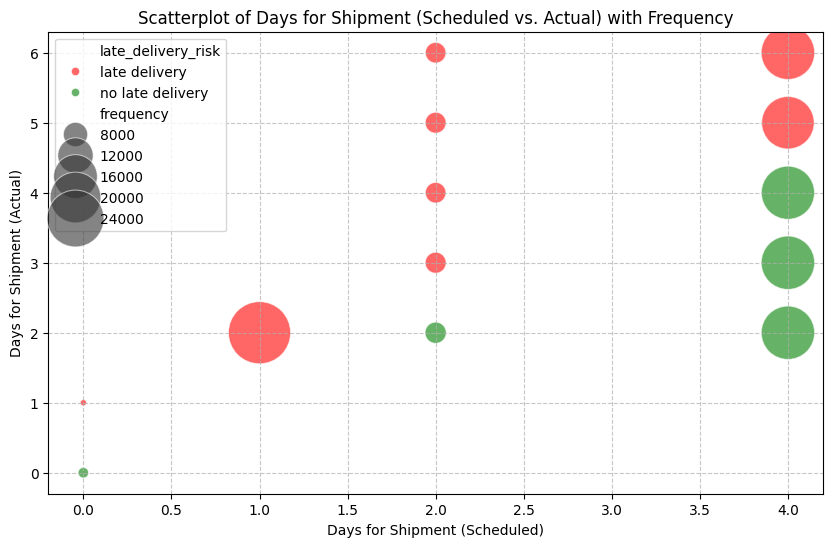

In [22]:
# Scatterplot of Actual vs. Scheduled Shipping Days with Frequency of Late Delivery Risk

# Calculate the frequency of each combination and convert it into a DataFrame
frequency_data = df[['days_for_shipping_real', 'days_for_shipment_scheduled']].value_counts().reset_index()
frequency_data.columns = ['days_for_shipping_real', 'days_for_shipment_scheduled', 'frequency']

# Add a column for late delivery risk (classify as 'late delivery' if actual shipping days are greater than scheduled days)
frequency_data['late_delivery_risk'] = frequency_data['days_for_shipping_real'] > frequency_data['days_for_shipment_scheduled']
frequency_data['late_delivery_risk'] = frequency_data['late_delivery_risk'].map({True: 'late delivery', False: 'no late delivery'})

palette = {'no late delivery': 'green', 'late delivery': 'red'}
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='days_for_shipment_scheduled',
    y='days_for_shipping_real',
    hue='late_delivery_risk',
    size='frequency',            
    sizes=(20, 2000),       
    data=frequency_data,
    palette=palette,
    legend="brief",
    alpha=0.6)

plt.title('Scatterplot of Days for Shipment (Scheduled vs. Actual) with Frequency')
plt.xlabel('Days for Shipment (Scheduled)')
plt.ylabel('Days for Shipment (Actual)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.show()

#### Insights from Delivery Risk by Shipping Mode

1. **Based on Proportion (Risk Ratio)**: When looking at the proportion of late deliveries to on-time deliveries, **First Class** (1 Day) has the highest risk ratio.

2. **Based on Frequency**: In terms of total number of late deliveries (frequency), the **Standard Class** (4 Days) shipping mode is the most problematic. 

## Feature Selection

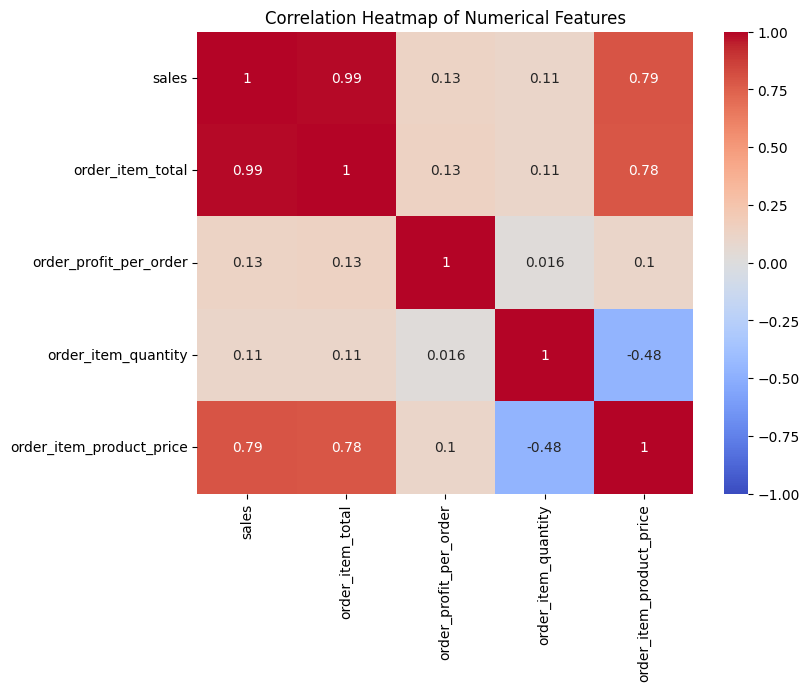

In [23]:
# Correlation Analysis between Numerical Features (Heatmap)
corr_matrix = df[['sales', 'order_item_total', 'order_profit_per_order', 'order_item_quantity', 'order_item_product_price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [24]:
# To avoid multicollinearity, remove 'order_item_total' due to high correlation with 'sales'
# Based on the previous EDA, we identified a strong correlation between 'sales' and 'order_item_total' (correlation coefficient ~0.99).
# Retain 'sales' as it is more interpretable for business analysis, 
df = df.drop(columns=['order_item_total'])

In [25]:
# These features are directly related to the target variable 
# By removing these variables, we allow the model to learn from other features that provide indirect yet meaningful insights for predictions.
df = df.drop(columns=['delivery_status', 'days_for_shipping_real', 'days_for_shipment_scheduled'])

## Feature Scaling

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['late_delivery_risk'])
y = df['late_delivery_risk']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Label Encoding for categorical columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standard Scaling for numerical columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(126363, 17) (54156, 17) (126363,) (54156,)


## Modeling

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier

# Define models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
}

results = []

from tqdm import tqdm

# Wrap models with tqdm to display progress
for model_name, model in tqdm(models.items(), desc="Training models"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Calculate AUC-ROC for models with predict_proba
    y_proba = model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_df)

Training models:  38%|███▊      | 3/8 [01:23<02:12, 26.60s/it]c:\Users\박주형\OneDrive\바탕 화면\SCM_Project\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:25:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Training models:  88%|████████▊ | 7/8 [02:45<00:27, 27.07s/it]c:\Users\박주형\OneDrive\바탕 화면\SCM_Project\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
Training models: 100%|██████████| 8/8 [02:58<00:00, 22.31s/it]

                 Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0    Gradient Boosting  0.708693   0.761895  0.708693  0.702021  0.769203
1             AdaBoost  0.708361   0.766057  0.708361  0.700858  0.766201
2              XGBoost  0.705000   0.742414  0.705000  0.701074  0.768004
3  Logistic Regression  0.688936   0.715299  0.688936  0.686709  0.713870
4          Naive Bayes  0.680035   0.714563  0.680035  0.675899  0.724274
5        Random Forest  0.679278   0.686612  0.679278  0.679965  0.757455
6        Decision Tree  0.637326   0.637859  0.637326  0.637561  0.634600
7                  KNN  0.630420   0.631021  0.630420  0.630682  0.683476


### Results

In [28]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Gradient Boosting,0.708693,0.761895,0.708693,0.702021,0.769203
1,AdaBoost,0.708361,0.766057,0.708361,0.700858,0.766201
2,XGBoost,0.705000,0.742414,0.705000,0.701074,0.768004
3,Logistic Regression,0.688936,0.715299,0.688936,0.686709,0.713870
4,Naive Bayes,0.680035,0.714563,0.680035,0.675899,0.724274
5,Random Forest,0.679278,0.686612,0.679278,0.679965,0.757455
6,Decision Tree,0.637326,0.637859,0.637326,0.637561,0.634600
7,KNN,0.630420,0.631021,0.630420,0.630682,0.683476


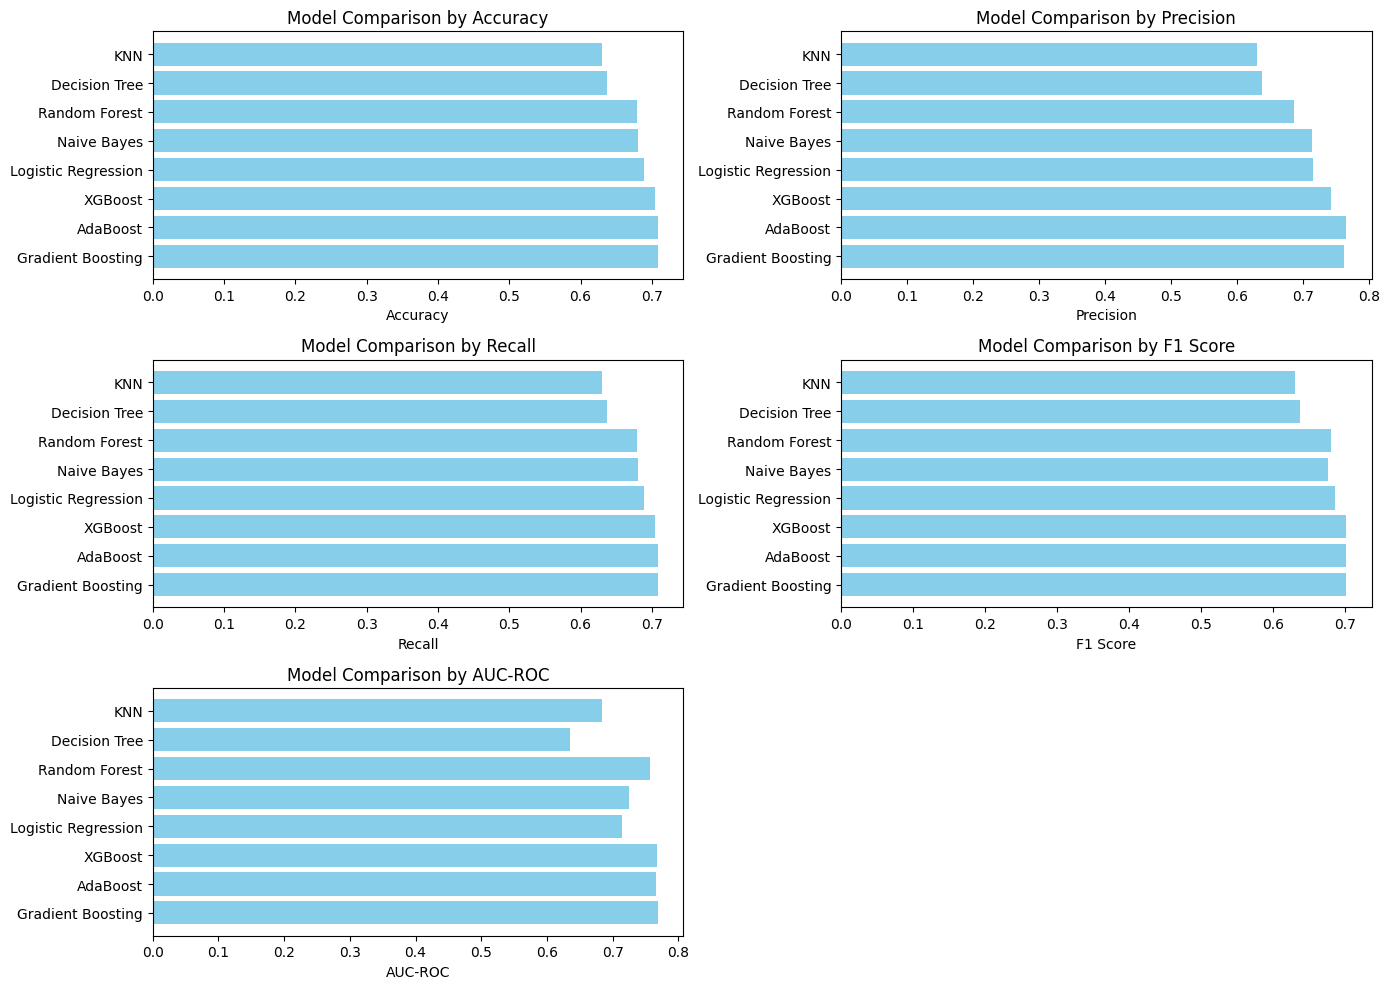

In [29]:
# Bar charts for each performance metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    plt.barh(results_df['Model'], results_df[metric], color='skyblue')
    plt.xlabel(metric)
    plt.title(f'Model Comparison by {metric}')

plt.tight_layout()
plt.show()

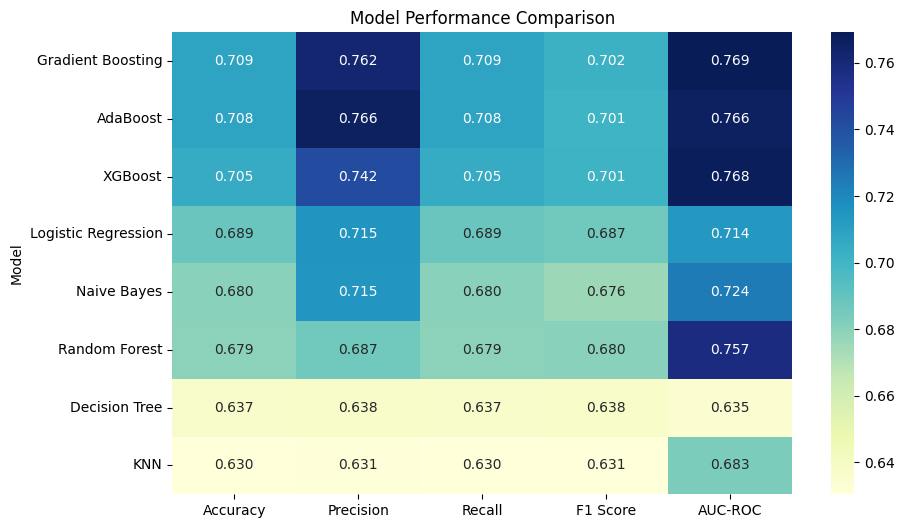

In [30]:
# Heatmap for overall performance compariso
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index('Model'), annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Model Performance Comparison")
plt.show()

#### Model Performance Summary

The **Gradient Boosting** model was selected as the final model for predicting late delivery risk. It was chosen because it achieved the highest scores across key metrics, including accuracy (0.709), Recall(0.709), F1 Score(0.702), and AUC-ROC (0.769). These results indicate that Gradient Boosting provides a well-balanced performance, effectively identifying both late and on-time deliveries, making it a reliable choice for managing delivery risk in the supply chain.


### Feature Importance

                     Feature  Importance
16             shipping_mode    0.769705
13              order_status    0.225476
12              order_region    0.001157
1         sales_per_customer    0.000842
0          benefit_per_order    0.000721
11    order_profit_per_order    0.000546
5                     market    0.000353
8    order_item_profit_ratio    0.000335
15             product_price    0.000223
6   order_item_discount_rate    0.000177
3           customer_segment    0.000154
14              product_name    0.000090
10                     sales    0.000081
2              category_name    0.000075
7   order_item_product_price    0.000049
9        order_item_quantity    0.000016
4            department_name    0.000000


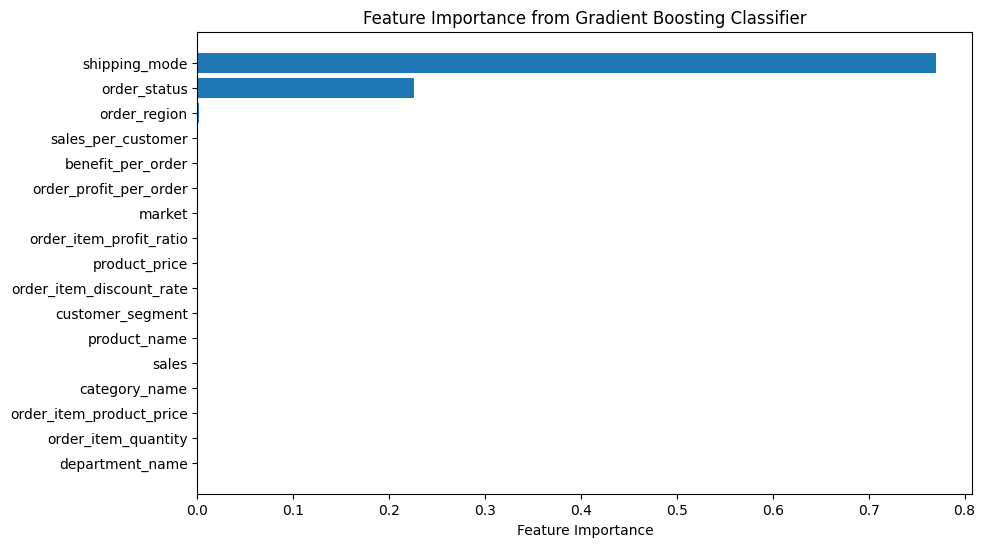

In [ ]:
# Initialize and train the Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Get feature importance
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print(importance_df)

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis() 
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Gradient Boosting Classifier')
plt.show()
